In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [37]:
path = "/content/cluster_data.csv"
cluster_data = pd.read_csv(path)
cluster_data.drop('Unnamed: 0',axis = 1,inplace = True)
cluster_data.head()

,0,1
0,2.336858,2.265735
1,1.327879,1.535489
2,2.822353,2.418167
3,1.521233,1.140626
4,2.953332,2.601195



**Implementing K-Means Algorithm**

**Steps:**

1.   Firslt, we pick k points as the initial centroids from the data set, either randomly or the fist K.
2.   Next, we find the "Euclidean distance" of each point in the data set with the identified k points — cluster centroids.
3.   Next, we assign each data point to the closest centroid using the distance found in the previous step.
4.   Next, we find the new centroid by taking the average of the points in each cluster group.
5.   Finally, we repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.

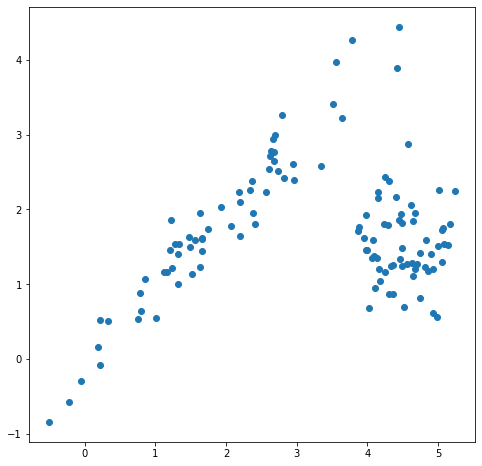

In [39]:
cluster_data = np.array(cluster_data)
plt.figure(figsize=(8,8))
plt.scatter(cluster_data[:,0], cluster_data[:,1])
plt.show()

In [40]:
class K_Means():
    def __init__(self, k):
        self.k = k
        self.tolerance_val = 0.001
        self.max_iteration = 500
   
    def calculate_distance(self,x1,x2):
      return (sum((x1 - x2)**2))**0.5

    def fit(self,data):

        self.centers = {}
        #initialize the centers, the first 'k' elements in the dataset will be our initial centers

        for i in range(self.k):
            self.centers[i] = data[i]
        
        for i in range(self.max_iteration):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for point in data:
                distances = [self.calculate_distance(point,self.centers[center]) for center in self.centers]
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            centers_old = dict(self.centers)
            #average the cluster datapoints to re-calculate the centers

            for cluster_index in self.classes:
                self.centers[cluster_index] = np.average(self.classes[cluster_index],axis=0)

            isOptimal = True

            for c in self.centers:
                original_centers = centers_old[c]
                new_centers = self.centers[c]
                if np.sum((new_centers-original_centers)/original_centers*100.0) > self.tolerance_val:
                    isOptimal = False

            #the centers don't change their positions much(more than our tolerance_val)
            if isOptimal:
                break
            return self.classes

### **Plot the K-Means for K = 2**


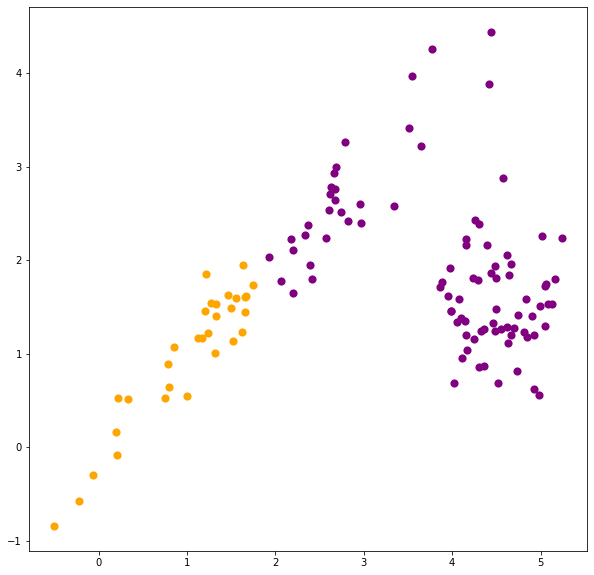

In [41]:
colors = ['purple','orange','yellow']
plt.figure(figsize=(10,10))

k_means_model = K_Means(2)
classes = k_means_model.fit(cluster_data)

for i in classes:
    color = colors[i]
    for points in classes[i]:
        plt.scatter(points[0], points[1], color=color, s=10, linewidths=5)
plt.show()

### **Plot The K-Means for K = 3**

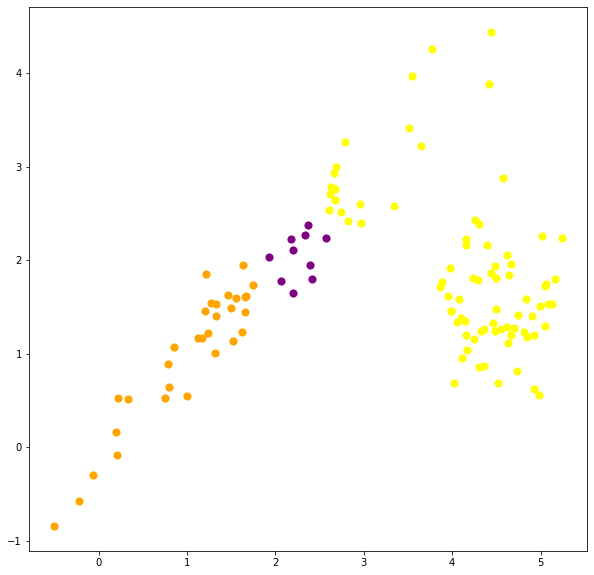

In [42]:
plt.figure(figsize=(10,10))
k_means_model = K_Means(3)
classes = k_means_model.fit(cluster_data)

for i in classes:
    color = colors[i]
    for points in classes[i]:
        plt.scatter(points[0], points[1], color=color, s=10, linewidths=5)
plt.show()